In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a_hhold_train = pd.read_csv("data/A_hhold_train.csv")
b_hhold_train = pd.read_csv("data/B_hhold_train.csv")
c_hhold_train = pd.read_csv("data/C_hhold_train.csv")

In [3]:
a_hhold_train.head()

,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
0,46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
1,82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
2,9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
3,10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
4,16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [4]:
a_hhold_train.tail()

,id,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
8198,45288,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,vVbnO,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
8199,65081,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,cLAGr,hmAUm,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
8200,34370,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,bUhyU,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
8201,12297,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,bUhyU,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
8202,39832,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,QRKWz,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A


In [8]:
a_hhold_train.loc[1:5,['country', 'poor']]

,country,poor
1,A,False
2,A,True
3,A,True
4,A,True
5,A,False


In [11]:
a_hhold_train.id.count()

8203

In [12]:
a_hhold_train.iloc[:, 2].unique()

array(['GUusz', 'alLXR'], dtype=object)

In [13]:
a_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8203 entries, 0 to 8202
Columns: 346 entries, id to country
dtypes: bool(1), float64(2), int64(3), object(340)
memory usage: 21.6+ MB


In [17]:
b_hhold_train.shape

(3255, 443)

In [19]:
c_hhold_train.shape

(6469, 165)

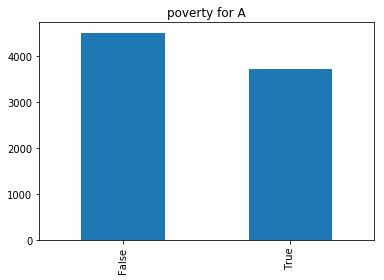

In [23]:
a_hhold_train.poor.value_counts().plot.bar(title="poverty for A")

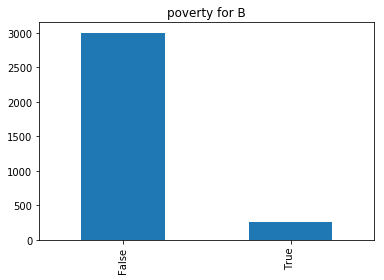

In [24]:
b_hhold_train.poor.value_counts().plot.bar(title="poverty for B")

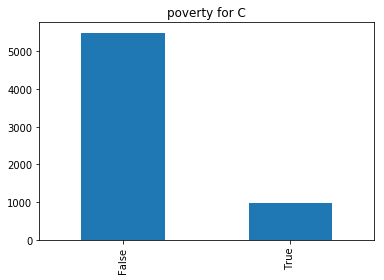

In [25]:
c_hhold_train.poor.value_counts().plot.bar(title="poverty for C")

In [35]:
a_hhold_train.select_dtypes(include=["float64", "int64"])

,id,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh
0,46107,-16.0,21,-2.0,-7
1,82739,-10.0,12,-3.0,-1
2,9646,-4.0,12,-3.0,-7
3,10975,-4.0,3,-4.0,-1
4,16463,-4.0,21,-4.0,-5
5,98438,-4.0,12,-3.0,-1
6,84763,-4.0,21,-4.0,1
7,96788,-4.0,12,-3.0,-3
8,49696,-10.0,30,-2.0,-1
9,9346,-4.0,21,-4.0,-9


In [37]:
td = {"a":["edo", "delta", "delta", "edo", "delta", "delta"],
     "b": ["Nigeria", "Ghana", "Ghana", "Ethiopia", "Nigeria", "Nigeria"],
     "c": ["Africa", "Europe", "America", "Oceania", "Asia", "Africa"]}
testdf = pd.DataFrame(td)

In [39]:
testdf

,a,b,c
0,edo,Nigeria,Africa
1,delta,Ghana,Europe
2,delta,Ghana,America
3,edo,Ethiopia,Oceania
4,delta,Nigeria,Asia
5,delta,Nigeria,Africa


In [40]:
pd.get_dummies(testdf)

,a_delta,a_edo,b_Ethiopia,b_Ghana,b_Nigeria,c_Africa,c_America,c_Asia,c_Europe,c_Oceania
0,0,1,0,0,1,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,0,0
3,0,1,1,0,0,0,0,0,0,1
4,1,0,0,0,1,0,0,1,0,0
5,1,0,0,0,1,1,0,0,0,0
